<a href="https://colab.research.google.com/github/Abdelrahman26/Handwritten-Digits-Classification/blob/main/Imnist_handwritten_digit_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.nn import Flatten, Linear, ReLU, Conv2d, MaxPool2d

In [ ]:
# download train data set and save it in file
trainset = datasets.MNIST('mnist_dataset', train=True, download=True);

In [ ]:
x, y = trainset[0]

In [ ]:
type(x)

PIL.Image.Image

In [ ]:
print(y)

5


torch.Size([28, 28])


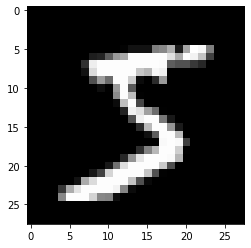

In [ ]:
# PIL don't support indexing
# convert from PIL to numpy 
x = np.array(x)
x = torch.tensor(x)
print(x.shape)
plt.imshow(x, cmap= 'gray')

In [ ]:
# transforms.ToTensor converts the data into torch tensor and divides by 255
trainset.transform = transforms.ToTensor()

In [ ]:
x, y = trainset[0]

In [ ]:
print(type(x))
print(x.min(), x.max())

<class 'torch.Tensor'>
tensor(0.) tensor(1.)


In [ ]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle= True)

In [ ]:
len(train_loader)

938

64
torch.Size([64, 1, 28, 28])


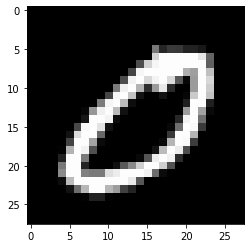

In [ ]:
for X, y in train_loader:
  print(len(X))
  print(X.shape) # [# of images in Mini-Batch, # channels, H, W] -> NCHW
  plt.imshow(X[24][0], cmap='gray')
  break;

In [ ]:
# Build the model
model = torch.nn.modules.Sequential(Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    MaxPool2d(2, 2),   # Filter size 2, stride 2
                                    Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Flatten(),
                                    Linear(10*14*14, 10)
                                    )

In [ ]:
# move model to GPU
model = model.cuda()

In [ ]:
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print_every = 100

In [ ]:
# Optimization loop
for epoch in range(10):
    print('Start of epoch', epoch)
    total_loss = 0
    total_examples = 0
    total_correct = 0
    
    for iteration, (X, y) in enumerate(train_loader):
        # Forward
        X = X.cuda()    
        y = y.cuda()
        scores = model(X) # -> (N, 10)

        # Loss
        loss = torch.nn.functional.cross_entropy(scores, y)

        # Accuracy
        preds = torch.argmax(scores, dim=1)
        num_correct = torch.sum(preds == y)
        
        # Print
        total_loss += loss.item()
        total_correct += num_correct.item()
        total_examples += len(X)
        if iteration % print_every == 0:
            print(total_loss / total_examples, total_correct / total_examples)
        
        # Backward
        loss.backward()
        
        # Update
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()

Start of epoch 0
0.03594396635890007 0.125
0.016590434938005293 0.6905940594059405
0.01108193566874411 0.7923662935323383
0.0089511860268766 0.8323297342192691
0.007730535665547889 0.8558291770573566
0.006932852407285345 0.8700099800399201
0.006354045420679761 0.8812136023294509
0.005836777236347835 0.8909593437945792
0.0054007642093630796 0.898876404494382
0.005039169348200853 0.9056603773584906
Start of epoch 1
0.002102237893268466 0.9375
0.0017724149439156535 0.9675123762376238
0.001787501989646041 0.9661069651741293
0.0017473523096901602 0.966985049833887
0.0016824438637212508 0.9683993142144638
0.0016938965722194457 0.9687188123752495
0.0016653217671304622 0.9694519550748752
0.0016260177628422813 0.96955242510699
0.0015923800130574423 0.9704275905118602
0.001581973886032321 0.970553551609323
Start of epoch 2
0.0008808940765447915 0.984375
0.0011646254411737185 0.9769492574257426
0.0011914243337895782 0.9762904228855721
0.001147504606796854 0.9775747508305648
0.001160733846715591 0

In [ ]:
# Measure test accuracy
testset = datasets.MNIST('mnist_dataset', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

print('testset has', len(testset), 'images')

correct = 0

with torch.no_grad():
    for X, y in test_loader:
        X = X.cuda()
        y = y.cuda()

        scores = model(X)
        preds = torch.argmax(scores, dim=1)
        
        correct += torch.sum(preds == y)

    print('correct = ', correct.item() / len(testset))

testset has 10000 images
correct =  0.9872
